# README : Notebook d’Entraînement pour la Prédiction de BCC (Basal Cell Carcinoma)

## **Introduction**
Ce notebook est dédié à l’entraînement de différents modèles de machine learning pour la prédiction du cancer de type BCC (Basal Cell Carcinoma) à partir de données fusionnées entre des images et des métadonnées traitées. Cette phase est cruciale pour analyser les performances des modèles sur plusieurs ensembles de données, comparer leurs métriques, et préparer une évaluation exhaustive.



## **Résumé de la Phase Exploratoire**
1. **Objectif de la phase exploratoire :**  
   - Examiner les métadonnées fournies, identifier les colonnes pertinentes, et nettoyer les données.
   - Standardiser les formats et valeurs, notamment pour des colonnes comme l'âge, les localisations anatomiques, et les labels.

2. **Traitement des métadonnées :**  
   - Les colonnes inutiles ou redondantes ont été supprimées (par exemple, apres analyse nous avons pu voir que la donnee du sexe de l'individus n'est pas tres pertinente pour predire son cancer de la peau ).
   - Certaines colonnes ont été encodées sous forme de variables binaires (comme les localisations anatomiques).

3. **Fusion des données :**  
   - Les ensembles de métadonnées nettoyés ont été fusionnés avec des datasets contenant les pixels des images (par exemple, des images en niveaux de gris ou en couleurs).
   - Les nouveaux fichiers CSV générés combinent des informations visuelles et contextuelles, prêts pour l’entraînement des modèles.

4. **Nouveaux datasets générés :**  
   - Chaque dataset représente un type spécifique d’image (8x8 ou 28x28, en niveaux de gris ou RGB).
   - **Exemples de fichiers :**
     - `Meta_Data_Processed_8L.csv` : Images 8x8 en niveaux de gris avec métadonnées.
     - `Meta_Data_Processed_28RGB.csv` : Images 28x28 en RGB avec métadonnées.



## **Objectif de ce Notebook**
### **1. Entraînement des modèles pour la prédiction de BCC**
   - La variable cible est `is_bcc` (0 : non-BCC, 1 : BCC). Les colonnes non pertinentes à cette tâche, comme `label`, seront supprimées pour éviter les redondances.

### **2. Évaluation poussée des performances des modèles**
   - Plusieurs algorithmes seront testés (ex. : Random Forest, SVM, Réseaux Neuronaux, etc.).
   - Les métriques incluront :
     - Accuracy
     - Précision, rappel, F1-score
     - Courbes ROC et AUC
   - Comparaison des performances sur les 4 datasets (28x28 et 8x8, niveaux de gris et RGB).



## **Structure des Données**
Les fichiers CSV contiennent :
1. **Colonnes de pixels :**  
   - Représentent les valeurs des pixels des images, préalablement non standardisées (elles seront normalisées avant l’entraînement).
   - Exemple : `pixel0000, pixel0001, ..., pixel0063` pour des images 8x8.

2. **Colonnes de métadonnées :**
   - `age` : Âge du patient.
   - `localization_*` : Localisation anatomique, encodée sous forme binaire.
   - `is_bcc` : Cible pour la classification.


## **Étapes du Notebook**
1. **Chargement et Prétraitement des Données**
   - Chargement des fichiers CSV.
   - Suppression des colonnes inutiles ou redondantes (`label`).
   - Normalisation des colonnes de pixels (exemple : division par 255 pour les mettre entre 0 et 1).

2. **Séparation des Données**
   - Division en ensembles d’entraînement et de test.
   - Stratification pour garantir une répartition équilibrée de la variable cible.

3. **Entraînement des Modèles**
   - Test de différents algorithmes :

4. **Évaluation des Modèles**
   - Métriques calculées pour chaque modèle.
   - Analyse des courbes ROC.
   - Comparaison des performances entre modèles et entre datasets.

5. **Sauvegarde des Modèles**
   - Les modèles entraînés seront enregistrés au format `.pkl` pour une utilisation ultérieure.
   - Exemple : `model_rf_8L.pkl` pour un modèle Random Forest sur le dataset 8x8 en niveaux de gris.


## **Résultats Attendus**
- Identifier le modèle le plus performant pour la prédiction de BCC.
- Comprendre l’impact des différentes résolutions (8x8 vs 28x28) et des formats (niveaux de gris vs RGB) sur les performances.
- Préparer une documentation exhaustive pour l’intégration future de ces modèles.


## **Fichiers Produits**
1. **Fichiers de sortie :**
   - Modèles entraînés sous forme de fichiers `.pkl`.
   - Rapports d’évaluation pour chaque modèle (sauvegardés en fichiers texte ou CSV).

2. **Fichiers intermédiaires :**
   - Graphiques de visualisation des courbes ROC.
   - Logs d’entraînement pour la traçabilité.

In [58]:
#cd "C:\Users\donfa\OneDrive\Desktop\PROJET MACHINE LEARNING\skin-cancer-prediction-bcc"

In [59]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns



## ENTRAINEMENT AVEC LE DATASET 8L : IMAGES 8x8 EN NIVEAUX DE GRIS

In [60]:
# Charger le dataset
dataset_path = "data/processed/Meta_Data_Processed_8L.csv"
df = pd.read_csv(dataset_path)


print(f"Dimensions du dataset : {df.shape}")
df.head()


Dimensions du dataset : (10015, 81)


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,172,182,191,183,180,181,165,164,173,192,...,0,0,0,0,0,0,1,0,0,0
1,98,149,170,193,183,162,164,100,137,175,...,0,0,0,0,0,0,1,0,0,0
2,165,164,179,172,152,163,169,151,168,174,...,0,0,0,0,0,0,1,0,0,0
3,109,159,167,166,163,159,155,96,141,168,...,0,0,0,0,0,0,1,0,0,0
4,173,202,210,194,208,248,243,205,180,142,...,0,0,0,0,0,0,0,0,0,0


#### Le dataset contient 64 colonnes de pixels (8x8) et 16 colonnes de métadonnées. , nous allons eliminer la colone label , car elle est redondante avec la colonne is_bcc

In [61]:
# Supprimer la colonne 'label'
df.drop('label', axis=1, inplace=True)

#### Leger resumé des données

In [62]:
# Informations sur le dataset
print("\nRésumé des données :")
(df.info())

# Statistiques descriptives
print("\nStatistiques descriptives :")
df.describe()



Résumé des données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 80 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pixel0000                     10015 non-null  int64  
 1   pixel0001                     10015 non-null  int64  
 2   pixel0002                     10015 non-null  int64  
 3   pixel0003                     10015 non-null  int64  
 4   pixel0004                     10015 non-null  int64  
 5   pixel0005                     10015 non-null  int64  
 6   pixel0006                     10015 non-null  int64  
 7   pixel0007                     10015 non-null  int64  
 8   pixel0008                     10015 non-null  int64  
 9   pixel0009                     10015 non-null  int64  
 10  pixel0010                     10015 non-null  int64  
 11  pixel0011                     10015 non-null  int64  
 12  pixel0012                     10015 no

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
count,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,...,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000
mean,156.511533,167.292461,171.177933,171.134199,171.372641,171.535597,167.875087,156.103045,161.946880,168.198203,...,0.074388,0.031852,0.004793,0.008987,0.207389,0.016775,0.012781,0.140190,0.023365,0.111633
std,37.482126,26.222928,23.467171,23.795547,23.776595,23.354094,25.726513,37.252888,29.992239,24.419041,...,0.262415,0.175615,0.069067,0.094375,0.405457,0.128433,0.112333,0.347201,0.151067,0.314930
min,0.000000,2.000000,12.000000,25.000000,13.000000,1.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,143.000000,153.000000,157.000000,157.000000,157.000000,157.000000,153.000000,141.000000,148.000000,154.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,163.000000,169.000000,172.000000,172.000000,173.000000,173.000000,170.000000,163.000000,165.000000,169.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,179.000000,184.000000,186.000000,186.000000,187.000000,187.000000,185.000000,180.000000,180.000000,184.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,251.000000,255.000000,253.000000,249.000000,249.000000,255.000000,252.000000,242.000000,255.000000,249.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Gestion des evenuelles valeurs manquantes

In [63]:
# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
print("\nValeurs manquantes par colonne :")
print(missing_values[missing_values > 0])

# Gestion des valeurs manquantes (imputation par la moyenne pour les colonnes numériques)
df_cleaned = df.fillna(df.mean(numeric_only=True))

# Confirmation des modifications
print("\nDataset après nettoyage :")
print(df_cleaned.head())
print(f"Dimensions après nettoyage : {df_cleaned.shape}")
df_cleaned.head()


Valeurs manquantes par colonne :
age    57
dtype: int64

Dataset après nettoyage :
   pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        172        182        191        183        180        181   
1         98        149        170        193        183        162   
2        165        164        179        172        152        163   
3        109        159        167        166        163        159   
4        173        202        210        194        208        248   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  localization_face  \
0        165        164        173        192  ...                  0   
1        164        100        137        175  ...                  0   
2        169        151        168        174  ...                  0   
3        155         96        141        168  ...                  0   
4        243        205        180        142  ...                  0   

   localization_foot  localization_genital  locali

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,172,182,191,183,180,181,165,164,173,192,...,0,0,0,0,0,0,1,0,0,0
1,98,149,170,193,183,162,164,100,137,175,...,0,0,0,0,0,0,1,0,0,0
2,165,164,179,172,152,163,169,151,168,174,...,0,0,0,0,0,0,1,0,0,0
3,109,159,167,166,163,159,155,96,141,168,...,0,0,0,0,0,0,1,0,0,0
4,173,202,210,194,208,248,243,205,180,142,...,0,0,0,0,0,0,0,0,0,0


### Division des Données en Ensembles d’Entraînement et de Test

In [64]:
X = df_cleaned.drop(columns=['is_bcc'], errors='ignore')  # 'is_bcc' est la cible
y = df_cleaned['is_bcc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nDimensions des ensembles d'entraînement : {X_train.shape}, {y_train.shape}")
print(f"Dimensions des ensembles de test : {X_test.shape}, {y_test.shape}")



Dimensions des ensembles d'entraînement : (8012, 79), (8012,)
Dimensions des ensembles de test : (2003, 79), (2003,)


### Standardisation des Caractéristiques
Pour de meilleurs résultats avec certains modèles, il est important de standardiser les données.

In [65]:
# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nAperçu des données standardisées (entraînement) :")
(pd.DataFrame(X_train_scaled, columns=X.columns).head())



Aperçu des données standardisées (entraînement) :


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,0.412125,0.292124,0.457117,0.578534,0.569986,0.571216,0.582093,0.637963,0.066583,-0.782400,...,-0.28143,-0.18639,-0.071719,-0.093882,-0.507906,-0.131406,-0.115791,-0.404585,-0.155433,-0.356179
1,-0.921133,-1.038006,-0.518137,0.034367,0.150839,0.018072,0.001319,0.450325,-1.199845,-0.863962,...,-0.28143,-0.18639,-0.071719,-0.093882,-0.507906,-0.131406,-0.115791,-0.404585,-0.155433,2.807576
2,-2.014405,-1.304031,-0.984563,-0.593518,-0.268307,-0.577621,-1.121510,-1.613689,-1.433135,-0.700838,...,-0.28143,-0.18639,-0.071719,-0.093882,-0.507906,-0.131406,-0.115791,-0.404585,6.433625,-0.356179
3,0.038813,-0.049909,-0.221321,-0.007492,-0.058734,-0.449972,-0.656891,-0.407447,-0.300014,-0.129902,...,-0.28143,-0.18639,-0.071719,-0.093882,-0.507906,-0.131406,-0.115791,-0.404585,-0.155433,-0.356179
4,-0.574486,-0.619965,-0.814954,-0.635377,-0.226393,-0.067027,-0.502018,-0.300226,-0.966556,-0.782400,...,-0.28143,-0.18639,-0.071719,-0.093882,1.968869,-0.131406,-0.115791,-0.404585,-0.155433,-0.356179


### Modèle de régression logistique sur 8L

Exactitude (Accuracy) : 0.95
Score ROC-AUC : 0.91


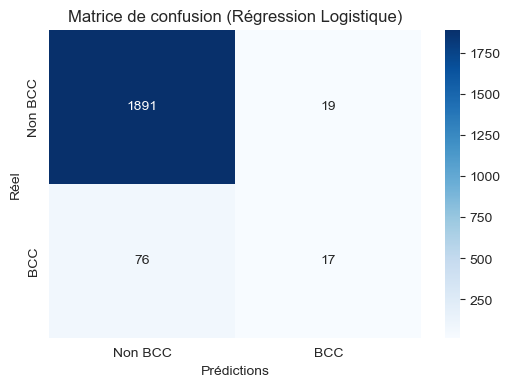

In [66]:

# Entraînement
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_scaled, y_train)

# Prédictions
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

# Calcul des métriques
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)

print(f"Exactitude (Accuracy) : {accuracy_logreg:.2f}")
print(f"Score ROC-AUC : {roc_auc_logreg:.2f}")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non BCC', 'BCC'], yticklabels=['Non BCC', 'BCC'])
plt.title("Matrice de confusion (Régression Logistique)")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
# sauvegarde de l'image de la matrice de confusion dans le dossier reports/images/entrainement/8L avec creation du dossier si il n'existe pas
# create the folder if it doesn't exist
import os
if not os.path.exists('reports/images/entrainement/8L'):
    os.makedirs('reports/images/entrainement/8L')
plt.savefig('reports/images/entrainement/8L/mat_conf_logreg_8L.png')
plt.show()
# sauvegarde du modele au format pkl dans le dossier models/8L
filename = 'models/model_logreg_8L.pkl'
pickle.dump(logreg, open(filename, 'wb'))




### On remarque que la regression logistique a une accuracy de 0.95 et un score roc-auc de 0.91 cependant on peut essayer d'autres algorithmes pour voir si on peut avoir de meilleurs resultats , car pour la regression logistique le nombre de faux negatifs est assez eleve

### Modèle Random Forest sur 8L

Exactitude (Accuracy) : 0.96
Score ROC-AUC : 0.90


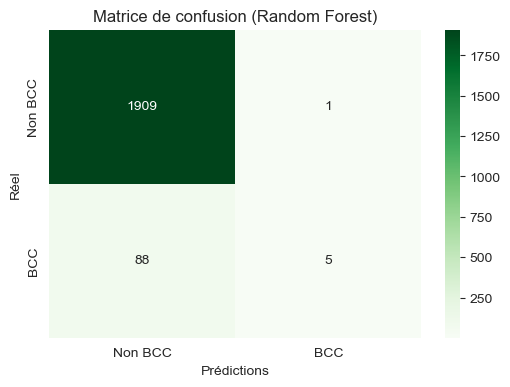

In [67]:
from sklearn.ensemble import RandomForestClassifier

# Entraînement
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Prédictions
y_pred_rf = rf.predict(X_test_scaled)
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Calcul des métriques
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"Exactitude (Accuracy) : {accuracy_rf:.2f}")
print(f"Score ROC-AUC : {roc_auc_rf:.2f}")

# Matrice de confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Non BCC', 'BCC'], yticklabels=['Non BCC', 'BCC'])

plt.title("Matrice de confusion (Random Forest)")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
# sauvegarde de l'image de la matrice de confusion dans le dossier reports/images/entrainement/8L avec creation du dossier si il n'existe pas
# create the folder if it doesn't exist
import os
if not os.path.exists('reports/images/entrainement/8L'):
    os.makedirs('reports/images/entrainement/8L')
plt.savefig('reports/images/entrainement/8L/mat_conf_rf_8L.png')
plt.show()
# sauvegarde du modele au format pkl dans le dossier models/8L
filename = 'models/model_rf_8L.pkl'
pickle.dump(rf, open(filename, 'wb'))




### Le modele Random Forest a une accuracy de 0.96 et un score roc-auc de 0.90 , on peut dire que c'est un tres bon modele pour la prediction de BCC , bien que le nombre de faux negatifs soit assez eleve , on peut essayer d'autres algorithmes pour voir si on peut avoir de meilleurs resultats

### Arbres de Décision sur 8L

Exactitude (Accuracy) : 0.93
Score ROC-AUC : 0.68


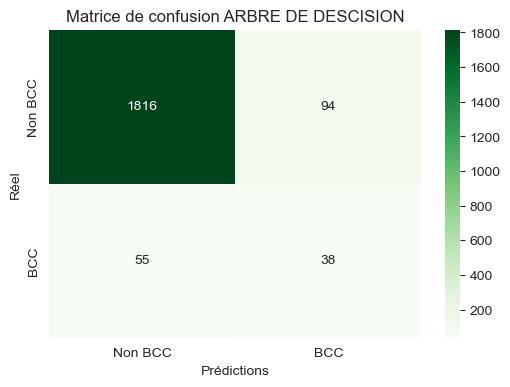

In [69]:
from sklearn.ensemble import RandomForestClassifier

# Entraînement
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

# Prédictions
y_pred_dt = dt.predict(X_test_scaled)
y_pred_proba_dt = dt.predict_proba(X_test_scaled)[:, 1]

# Calcul des métriques
accuracy_dt = accuracy_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

print(f"Exactitude (Accuracy) : {accuracy_dt:.2f}")
print(f"Score ROC-AUC : {roc_auc_dt:.2f}")

# Matrice de confusion
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=['Non BCC', 'BCC'], yticklabels=['Non BCC', 'BCC'])

plt.title("Matrice de confusion ARBRE DE DESCISION")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
# sauvegarde de l'image de la matrice de confusion dans le dossier reports/images/entrainement/8L avec creation du dossier si il n'existe pas
# create the folder if it doesn't exist
import os
if not os.path.exists('reports/images/entrainement/8L'):
    os.makedirs('reports/images/entrainement/8L')
plt.savefig('reports/images/entrainement/8L/mat_conf_dt_8L.png')
plt.show()
# sauvegarde du modele au format pkl dans le dossier models/8L
filename = 'models/model_dt_8L.pkl'
pickle.dump(rf, open(filename, 'wb'))




### Le modele d'arbre de decision identifie plus de cas BCC que les autres et mais moins de faux negatifs , il sera sans doute meilleur avec un jeu de donnees plus detaille 

## RECAPITULATIF DES MODELES SUR LE DATASET 8L : IMAGES 8x8 EN NIVEAUX DE GRIS
- Regression Logistique : Accuracy = 0.95, ROC-AUC = 0.91 mais beaucoup de faux negatifs
- Random Forest : Accuracy = 0.96, ROC-AUC = 0.90 , meilleur modele pour la prediction de BCC
- Decision Tree : Accuracy = 0.93, ROC-AUC = 0.68 , moins de faux negatifs que les autres modeles mais plus de faux positifs 

## ENTRAINEMENT AVEC LE DATASET 8RGB : IMAGES 8x8 EN RGB
